<a href="https://colab.research.google.com/github/lemonwater600ml/6220-hw2/blob/master/6220_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load data from tfds
tfds.disable_progress_bar()
tf.enable_v2_behavior()

start = time.time()

(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

print("Elapsed time for loading data: \n" +  str(round((time.time() - start)*1000)) + "ms")

# Convert to np.array
start = time.time()

train_array = np.vstack(tfds.as_numpy(ds_train))
X_train = np.array(list(map(lambda x: x[0], train_array)))
y_train = np.array(list(map(lambda x: x[1], train_array)))

test_array = np.vstack(tfds.as_numpy(ds_test))
X_test = np.array(list(map(lambda x: x[0], test_array)))
y_test = np.array(list(map(lambda x: x[1], test_array)))

print("Elapsed time for converting data into np.array: \n" +  str(round((time.time() - start)*1000)) + "ms")

Elapsed time for loading data: 
198ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


Elapsed time for converting data into np.array: 
32908ms


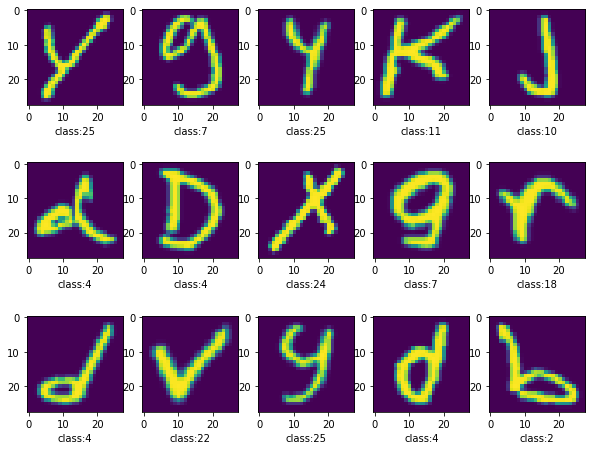

In [3]:
# Sample
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i].T.reshape([28,28]))
    ax.set_xlabel("class:"+ str(y_train[i]))
    # ax.set_xlabel("class:"+ str(y_train_k3[i]) + "(" + str(chr(y_train_k3[i]+64)) + ")")



In [4]:
# np.unique(y_train): 26
# np.unique(y_train): 19
# Select classes
classes = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
can = [1, 2, 3]
not_can = [4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


# Training data
# k = 3    => 3 classes, 1600 
# unkown > 4 ~ 19 => 16 classes. 100 each => unknow: 1600 images

# Filter classes for training data
counter = [0] * 26
filter_arr = []
y_train_k3_k3 = []
for elm in y_train:
  if int(elm) in can and counter[elm - 1] < 1600:
    filter_arr.append(True)
    counter[elm - 1] += 1
    y_train_k3_k3.append(elm)
  elif 4 <= int(elm) <= 19 and counter[elm - 1] < 100: 
    filter_arr.append(True)
    counter[elm - 1] += 1
    y_train_k3_k3.append(4)
  else:
    filter_arr.append(False)
    y_train_k3_k3.append(5)

X_train_k3 = X_train[filter_arr]
print(X_train_k3.shape)
# (6400, 28, 28, 1)
y_train_k3_k3 = np.asarray(y_train_k3_k3, dtype=np.int64)
y_train_k3 = y_train_k3_k3[filter_arr]
print(y_train_k3.shape)
# (6400,)


# Test data
counter_test = [0] * 26
filter_arr_test = []
y_test_k3_k3 = []
for elm in y_test:
  if int(elm) in can and counter_test[elm - 1] < 320:
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
    y_test_k3_k3.append(elm)
  elif 4 <= int(elm) <= 19 and counter_test[elm - 1] < 20: 
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
    y_test_k3_k3.append(4)
  else:
    filter_arr_test.append(False)
    y_test_k3_k3.append(5)

X_test_k3 = X_test[filter_arr_test]
print(X_test_k3.shape)
# (1280, 28, 28, 1)
y_test_k3_k3 = np.asarray(y_test_k3_k3, dtype=np.int64)
y_test_k3 = y_test_k3_k3[filter_arr_test]
print(y_test_k3.shape)
# (1280,)



(6400, 28, 28, 1)
(6400,)
(1280, 28, 28, 1)
(1280,)


In [5]:
# Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

# Model configuration
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 125,573
Trainable params: 125,573
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train model
start = time.time()

history = model.fit(
    X_train_k3, y_train_k3,
    epochs=10,
    validation_data=(X_test_k3, y_test_k3),
)

elapsed_time = time.time() - start
print("Elapsed time for training training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")


Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 4.1280 - accuracy: 0.7380 - val_loss: 1.4025 - val_accuracy: 0.7867
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.9344 - accuracy: 0.8308 - val_loss: 1.2842 - val_accuracy: 0.7586
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.8627 - val_loss: 0.7663 - val_accuracy: 0.8469
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.9009 - val_loss: 0.6982 - val_accuracy: 0.8453
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.9150 - val_loss: 0.7808 - val_accuracy: 0.8547
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9336 - val_loss: 0.8100 - val_accuracy: 0.8445
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9345 - val_loss: 0.5784 - val_accuracy: 0.8672
Epoch 

In [7]:
# Evaluate training data
start = time.time()

model.evaluate(x = X_train_k3, y = y_train_k3, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

200/200 - 0s - loss: 0.1552 - accuracy: 0.9522
Elapsed time for evaluating training set: 
203 ms


In [8]:
# Evaluate test data
start = time.time()

model.evaluate(x = X_test_k3, y = y_test_k3, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating test set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

40/40 - 0s - loss: 0.7209 - accuracy: 0.8734
Elapsed time for evaluating test set: 
66 ms


Text(0, 0.5, 'Accuray')

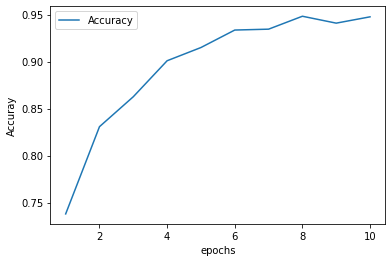

In [24]:
# Make accuracy plot
q = len(history.history['accuracy'])
plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [26]:
history.history['accuracy']

[0.7379687428474426,
 0.8307812213897705,
 0.8626562356948853,
 0.9009374976158142,
 0.9150000214576721,
 0.93359375,
 0.9345312714576721,
 0.9482812285423279,
 0.9409375190734863,
 0.9476562738418579]

In [10]:
# K = 11
# Select classes
classes = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
can = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11 ]
not_can = [12, 13, 14, 15, 16, 17, 18, 19]

# Training data
# k = 11 [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]    
# => 11 classes, 1600 each
# unkown > [12, 13, 14, 15, 16, 17, 18, 19] 
# => 8 classes. 200 each => unknow: 1600 images

# Filter classes for training data
counter = [0] * 26
filter_arr = []
y_train_k11_k11 = []
for elm in y_train:
  if int(elm) in can and counter[elm - 1] < 1600:
    filter_arr.append(True)
    counter[elm - 1] += 1
    y_train_k11_k11.append(elm)
  elif 12 <= int(elm) <= 19 and counter[elm - 1] < 200: 
    filter_arr.append(True)
    counter[elm - 1] += 1
    y_train_k11_k11.append(12)
  else:
    filter_arr.append(False)
    y_train_k11_k11.append(13)

X_train_k11 = X_train[filter_arr]
print(X_train_k11.shape)
# (19200, 28, 28, 1)
y_train_k11_k11 = np.asarray(y_train_k11_k11, dtype=np.int64)
y_train_k11 = y_train_k11_k11[filter_arr]
print(y_train_k11.shape)
# (19200,)


# Test data
counter_test = [0] * 26
filter_arr_test = []
y_test_k11_k11 = []
for elm in y_test:
  if int(elm) in can and counter_test[elm - 1] < 320:
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
    y_test_k11_k11.append(elm)
  elif 12 <= int(elm) <= 19 and counter_test[elm - 1] < 40: 
    filter_arr_test.append(True)
    counter_test[elm - 1] += 1
    y_test_k11_k11.append(12)
  else:
    filter_arr_test.append(False)
    y_test_k11_k11.append(13)

X_test_k11 = X_test[filter_arr_test]
print(X_test_k11.shape)
# (3840, 28, 28, 1)
y_test_k11_k11 = np.asarray(y_test_k11_k11, dtype=(np.int64))
y_test_k11 = y_test_k11_k11[filter_arr_test]
print(y_test_k11.shape)
# (3840,)


(19200, 28, 28, 1)
(19200,)
(3840, 28, 28, 1)
(3840,)


In [11]:
# k = 11
# Build model
model11 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(13, activation='softmax')
])

# Model configuration
model11.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Model summary
model11.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 13)                845       
Total params: 126,093
Trainable params: 126,093
Non-trainable params: 0
_________________________________________________________________


In [12]:
# k = 11
# Train model
start = time.time()

history11 = model11.fit(
    X_train_k11, y_train_k11,
    epochs=10,
    validation_data=(X_test_k11, y_test_k11),
)

elapsed_time = time.time() - start
print("Elapsed time for training training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")


Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 3.2482 - accuracy: 0.2844 - val_loss: 1.6768 - val_accuracy: 0.4099
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 1.4436 - accuracy: 0.5242 - val_loss: 1.3569 - val_accuracy: 0.5727
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 1.1110 - accuracy: 0.6439 - val_loss: 1.0548 - val_accuracy: 0.6693
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.9251 - accuracy: 0.7053 - val_loss: 0.9886 - val_accuracy: 0.6719
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.7775 - accuracy: 0.7561 - val_loss: 0.8003 - val_accuracy: 0.7521
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.6345 - accuracy: 0.7994 - val_loss: 0.7100 - val_accuracy: 0.7919
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.8218 - val_loss: 0.6361 - val_accuracy: 0.8122
Epoch 

In [13]:
# k = 11
# Evaluate training data
start = time.time()

model11.evaluate(x = X_train_k11, y = y_train_k11, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating training set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

600/600 - 1s - loss: 0.4418 - accuracy: 0.8736
Elapsed time for evaluating training set: 
539 ms


In [14]:
# k = 11
# Evaluate test data
start = time.time()

model11.evaluate(x = X_test_k11, y = y_test_k11, verbose=2)

elapsed_time = time.time() - start
print("Elapsed time for evaluating test set: \n" + str(int(round(elapsed_time * 1000))) + " ms")

120/120 - 0s - loss: 0.6510 - accuracy: 0.8206
Elapsed time for evaluating test set: 
135 ms


Text(0, 0.5, 'Accuray')

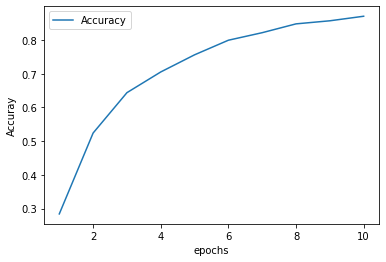

In [15]:
# k = 11
# Make accuracy plot
q = len(history11.history['accuracy'])
plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history11.history['accuracy'], label='Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')

In [25]:
history11.history['accuracy']

[0.28437501192092896,
 0.524218738079071,
 0.6439062356948853,
 0.7053124904632568,
 0.7561458349227905,
 0.7994270920753479,
 0.8217708468437195,
 0.8479166626930237,
 0.8570312261581421,
 0.870520830154419]